<a href="https://colab.research.google.com/github/eleven111101/K_Nearest_Neighbour/blob/main/KNN_Valueof_K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
print("hello world")

hello world


In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df=pd.read_csv("classified_data.csv")

In [32]:
df.head(5)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [34]:
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


In [35]:
df.isnull().sum()

WTT             0
PTI             0
EQW             0
SBI             0
LQE             0
QWG             0
FDJ             0
PJF             0
HQE             0
NXJ             0
TARGET CLASS    0
dtype: int64

In [36]:
df.shape

(1000, 11)

In [37]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
WTT,1000.0,0.949682,0.289635,0.174412,0.742358,0.940475,1.163295,1.721779
PTI,1000.0,1.114303,0.257085,0.441398,0.942071,1.118486,1.307904,1.833757
EQW,1000.0,0.834127,0.291554,0.170924,0.615451,0.813264,1.028340,1.722725
SBI,1000.0,0.682099,0.229645,0.045027,0.515010,0.676835,0.834317,1.634884
LQE,1000.0,1.032336,0.243413,0.315307,0.870855,1.035824,1.198270,1.650050
QWG,1000.0,0.943534,0.256121,0.262389,0.761064,0.941502,1.123060,1.666902
FDJ,1000.0,0.963422,0.255118,0.295228,0.784407,0.945333,1.134852,1.713342
PJF,1000.0,1.071960,0.288982,0.299476,0.866306,1.065500,1.283156,1.785420
HQE,1000.0,1.158251,0.293738,0.365157,0.934340,1.165556,1.383173,1.885690
NXJ,1000.0,1.362725,0.204225,0.639693,1.222623,1.375368,1.504832,1.893950


In [38]:
df["TARGET CLASS"].unique()

array([1, 0])

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X = df.drop("TARGET CLASS",axis=1)
y = df["TARGET CLASS"]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn = KNeighborsClassifier(n_neighbors=1)

In [46]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [47]:
prediction = knn.predict(X_test)

In [48]:
from sklearn.metrics import classification_report,confusion_matrix

In [55]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
prediction = knn.predict(X_test)
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

print(f'Train Score: {knn.score(X_train,y_train)*100}')
print(f'Test Score: {knn.score(X_test,y_test)*100}')

[[150   9]
 [ 13 128]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       159
           1       0.93      0.91      0.92       141

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

Train Score: 100.0
Test Score: 92.66666666666666


In [56]:
from sklearn.model_selection import cross_val_score
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,X,y,cv=10)
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Error Rate')

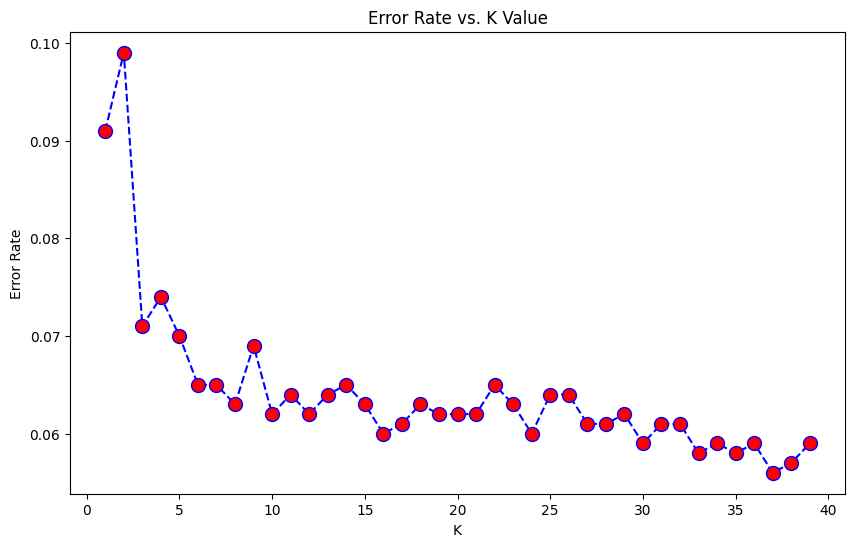

In [57]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [62]:
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train,y_train)
prediction = knn.predict(X_test)
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

print(f'Train Score: {knn.score(X_train,y_train)*100}')
print(f'Test Score: {knn.score(X_test,y_test)*100}')

[[152   7]
 [ 11 130]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       159
           1       0.95      0.92      0.94       141

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

Train Score: 94.28571428571428
Test Score: 94.0
